In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set()
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
y = (data['SalePrice'])
data = data.drop(['SalePrice','Id'],axis=1)

data['MSSubClass'] = data['MSSubClass'].astype(str)

In [6]:
def cod(data):
    data_int = data.select_dtypes(include=['int64','float64'])
    data_int = data_int.fillna(data_int.mean())

    data_obj = data.select_dtypes(include=['object'])
    data_obj = data_obj.fillna('None')

    data = data_obj.join(data_int)
    return data
data = cod(data)

In [7]:
data = pd.get_dummies(data)

In [8]:
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [9]:
data.shape

(1460, 317)

In [10]:
################# modelling #################################################

In [17]:
hour = pd.read_csv('data/bike/hour.csv')

hour.head()

hour.shape

(17379, 17)

In [18]:
hour.drop(['instant','dteday','casual','registered'],axis='columns',inplace=True)

In [19]:
y = hour['cnt']

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
seed = 17
n_train = 10

In [25]:
hour.shape,y.shape

((17379, 13), (17379,))

In [26]:
X_train,X_test,y_train,y_test = train_test_split(hour,y,random_state=seed,test_size=0.4)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10427, 13), (6952, 13), (10427,), (6952,))

In [27]:
#kf = KFold(n_splits=10,random_state=seed)

##for train_index, test_index in kf.split(X_train):
#    print("TRAIN:", train_index, "TEST:", test_index)

split_size = X_train.shape[0]//n_train
add = X_train.shape[0] - (X_train.shape[0]//n_train)*n_train

In [28]:
y_test = np.array(y_test)

In [29]:
from tqdm import tqdm_notebook

predictions = np.empty([n_train,X_test.shape[0]])
mse = np.empty(X_test.shape[0])

bias_list = []
var_list = []
mse_list = []
est_list = []


for n_estimators in tqdm_notebook(range(2,30)):
    for i in range(0,n_train):
        if (i == (n_train-1)):
            down_idx = split_size*(i)
            up_idx = split_size*(i+1) + add
        else:
            down_idx = split_size*i
            up_idx = split_size*(i+1)
        #print(i,down_idx,' ',up_idx)

        #X_train[down_idx:up_idx]

        #down_idx = 0
        #up_idx = down_idx + split_size

        m = RandomForestRegressor(random_state=seed,
                                 n_estimators=n_estimators)

        m.fit(X_train[down_idx:up_idx],y_train[down_idx:up_idx])

        predictions[i] = m.predict(X_test)
        #mse[i] = mean_squared_error(y_test,predictions[i])
    

    for i in range(0,X_test.shape[0]):
        se = []
        for j in range(0,n_train):
            se.append((predictions[j,i]-y_test[i])**2)
        mse[i] = np.mean(se)
        
    
    bias = (np.mean(predictions,axis=0)-y_test)**2
    var = np.var(predictions,axis=0)

    bias_list.append(np.mean(bias))
    var_list.append(np.mean(var))
    mse_list.append(np.mean(mse))
    est_list.append(n_estimators)

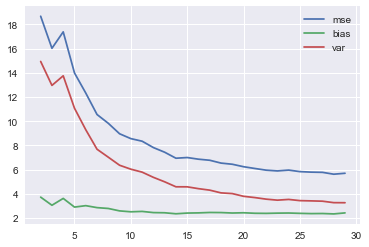

In [30]:
plt.plot(est_list,mse_list,label='mse')
plt.plot(est_list,bias_list,label='bias')
plt.plot(est_list,var_list,label='var')
plt.legend()

In [31]:
predictions.shape

(10, 6952)

In [32]:
predictions[0,0]

410.3448275862069

In [33]:
for i in range(0,X_test.shape[0]):
    se = []
    for j in range(0,n_train):
        se.append((predictions[j,i]-y_test[i])**2)
    mse[i] = np.mean(se)

In [34]:
mse.mean()

5.704596270126117

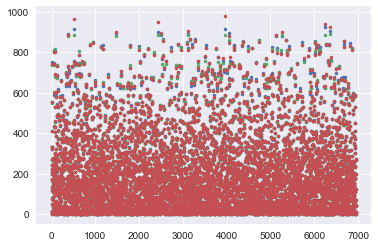

In [35]:
plt.plot(predictions[0],'.')
plt.plot(predictions[1],'.')
plt.plot(y_test,'.')

In [36]:
#pred_mean = np.mean(predictions,axis=0)

In [37]:
bias = (np.mean(predictions,axis=0)-y_test)**2
var = np.var(predictions,axis=0)

In [38]:
max(np.sqrt(bias))

75.35862068965525

In [39]:
predictions[:,0]

array([410.34482759, 408.75862069, 410.17241379, 413.5862069 ,
       409.89655172, 408.5862069 , 409.72413793, 410.03448276,
       410.10344828, 408.37931034])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


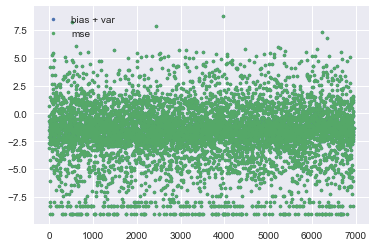

In [40]:
plt.plot(np.log(bias + var),'.',label='bias + var')
#plt.plot(np.log(var),'.',label='var')
plt.plot(np.log(mse),'.',label='mse')
plt.legend()

In [41]:
np.mean(bias)

2.4323922268410274

In [42]:
np.mean(var)

3.272204043285091

In [43]:
np.mean(mse)

5.704596270126117

In [44]:
(mse < (var + bias)).sum()

3147

In [45]:
mse.shape

(6952,)

In [ ]:
hour = pd.read_csv('data/bike/hour.csv')

hour.head()

hour.shape

hour.drop(['instant','dteday','casual','registered'],axis='columns',inplace=True)

hour.head()

hour.isna().sum().sum()

In [46]:
np.random.seed(17)

In [47]:
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [48]:
def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:,i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

In [50]:
n_repeat = 10       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [51]:
X_train = np.array(X_train).reshape((10,50))

In [52]:
X_train[0].shape

(50,)

In [53]:
np.array(y_train).shape

(10, 50)

In [54]:
X_test.shape

(1000, 1)

In [55]:
y_test.shape

(1000, 10)

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
seed = 17
n_train = 10

In [58]:
X_train,X_test,y_train,y_test = train_test_split(hour,y,random_state=seed,test_size=0.8)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

ValueError: Found input variables with inconsistent numbers of samples: [17379, 50]

In [ ]:
#kf = KFold(n_splits=10,random_state=seed)

##for train_index, test_index in kf.split(X_train):
#    print("TRAIN:", train_index, "TEST:", test_index)

split_size = X_train.shape[0]//n_train
add = X_train.shape[0] - (X_train.shape[0]//n_train)*n_train

y_test = np.array(y_test)

In [ ]:
from tqdm import tqdm_notebook

predictions = np.empty([n_train,X_test.shape[0]])
mse = np.empty(X_test.shape[0])

bias_list = []
var_list = []
mse_list = []
est_list = []

In [ ]:
X_train[0].shape

In [ ]:
y_train[0].shape

In [ ]:
X_train.shape

In [ ]:
X_train[9]

In [ ]:
y_test

In [ ]:
y_test = y_test.reshape(10,1000)

In [ ]:
y_test.shape

In [ ]:
for n_estimators in tqdm_notebook(range(1,30)):
    for i in range(0,n_train):
        

        m = RandomForestRegressor(random_state=seed,
                                 n_estimators=n_estimators)

        m.fit(X_train[i].reshape(-1,1),y_train[i])

        predictions[i] = m.predict(X_test)
        #mse[i] = mean_squared_error(y_test,predictions[i])
    
    for i in range(0,X_test.shape[0]):
        se = []
        for j in range(0,n_train):
            se.append((predictions[j,i]-y_test[j,i])**2)
        mse[i] = np.mean(se)
        
    bias_l = []
    for i in range(0,n_train):
        bias = (np.mean(predictions,axis=0)-y_test[i])**2
        bias_l.append(bias)
    
    var = np.var(predictions,axis=0)

    bias_list.append(np.mean(bias_l))
    var_list.append(np.mean(var))
    mse_list.append(np.mean(mse))
    est_list.append(n_estimators)

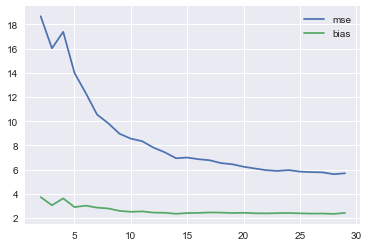

In [59]:
plt.plot(est_list,mse_list,label='mse')
plt.plot(est_list,bias_list,label='bias')
#plt.plot(est_list,var_list,label='var')
plt.legend()